In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create the training data

In [13]:
# Create data
N = 2000

# Generate data
data = torch.randint(low=-10, high=11, size=(N, 2)).float()

# "labels"
labels = torch.sum(data, axis=1, keepdim=True)

# Print the data
for i in range(N):
    print('{:<20} | {:<20}'.format(str(data[i]), str(labels[i])))

  tensor([ 6., -5.]) | tensor([1.])        
    tensor([6., 3.]) | tensor([9.])        
  tensor([ 5., -4.]) | tensor([1.])        
  tensor([-1.,  3.]) | tensor([2.])        
  tensor([-6.,  9.]) | tensor([3.])        
    tensor([5., 5.]) | tensor([10.])       
  tensor([ 1., -5.]) | tensor([-4.])       
    tensor([4., 0.]) | tensor([4.])        
  tensor([-7., -7.]) | tensor([-14.])      
  tensor([-4.,  7.]) | tensor([3.])        
  tensor([ 8., -3.]) | tensor([5.])        
  tensor([ 6., -6.]) | tensor([0.])        
  tensor([10.,  0.]) | tensor([10.])       
  tensor([ 1., -1.]) | tensor([0.])        
  tensor([ 9., -3.]) | tensor([6.])        
  tensor([-4.,  5.]) | tensor([1.])        
  tensor([ 2., -8.]) | tensor([-6.])       
    tensor([8., 9.]) | tensor([17.])       
  tensor([ 4., -4.]) | tensor([0.])        
tensor([-10.,   9.]) | tensor([-1.])       
  tensor([-6., -2.]) | tensor([-8.])       
tensor([-10.,   6.]) | tensor([-4.])       
  tensor([ 9., 10.]) | tensor([1

In [3]:
labels.shape

torch.Size([2000, 1])

# Design the model

In [14]:
def create_ADD_model():
    # Model architecture
    ADd_classify = nn.Sequential(
        nn.Linear(2, 30),   # Input layer
        nn.ReLU(),          # Activation unit
        nn.Linear(30, 1),   # Hidden layer
        nn.ReLU(),          # Activation unit
        nn.Linear(1, 1),    # Output unit
    )

    # Loss function
    loss_func = nn.MSELoss()

    # Optimizer
    optimizer = torch.optim.Adam(params=ADd_classify.parameters(), lr=0.01)

    # Model output
    return ADd_classify, loss_func, optimizer

# Train the model

In [15]:
# Fixed parameter
num_epochs = 10

def train_the_model(ADD_model):
    # Initialize losses
    losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch_i in range(num_epochs):
    
        num_loss = []

        # Loop through 'minibatches' of N = 1
        for numbers, answer in zip(data, labels):
            # Forward pass
            y_hat = ADD_model(numbers)

            # Loss
            loss = loss_func(y_hat, answer)
            num_loss.append(loss.item())

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    losses[epoch_i] = np.mean(num_loss)

    # Final forward pass
    with torch.no_grad():
        predictions = ADD_model(data)
    
    # Predictions and report accuracy
    train_acc = 100 * torch.mean((np.abs(predictions - labels) < 1).float())

    # Test with new data
    # Create brand new test data
    test_data   = torch.randint(low=-10, high=11, size=(N, 2)).float()
    test_labels = torch.sum(test_data, axis=1, keepdim=True)

    # Evaluate the model and compute accuracy
    with torch.no_grad():
        predictions = ADD_model(test_data)
    test_acc = 100 * torch.mean((np.abs(predictions - test_labels) < 1).float())

    
    return losses, train_acc, test_acc, ADD_model

In [20]:
# Test the model once to make sure it runs
adding_machine, loss_func, optimizer = create_ADD_model()
losses, train_acc, test_acc, add_model = train_the_model(adding_machine)

# Print the results
print('{:<5.2f}, {:<5.2f}'.format(train_acc, test_acc))

99.90, 99.85


# Run the experiment!

In [21]:
# Run the model 10 times to check reproducibility

for i in range(10):
    # Create a new 'machine' and train it
    adding_machine, loss_func, optimizer = create_ADD_model()
    losses, train_acc, test_acc, add_model = train_the_model(adding_machine)

    # Report accuracy
    print('Model instance {:<2}, final TRAIN/TEST accuracies: {:<6.2f}%, {:<6.2f}%'.format(i + 1, train_acc, test_acc))

Model instance 1 , final TRAIN/TEST accuracies: 9.55 , 9.20 
Model instance 2 , final TRAIN/TEST accuracies: 9.55 , 8.90 
Model instance 3 , final TRAIN/TEST accuracies: 9.55 , 9.00 
Model instance 4 , final TRAIN/TEST accuracies: 9.55 , 9.40 
Model instance 5 , final TRAIN/TEST accuracies: 99.90, 99.85
Model instance 6 , final TRAIN/TEST accuracies: 99.90, 99.85
Model instance 7 , final TRAIN/TEST accuracies: 9.55 , 10.00
Model instance 8 , final TRAIN/TEST accuracies: 9.55 , 9.05 
Model instance 9 , final TRAIN/TEST accuracies: 99.85, 99.85
Model instance 10, final TRAIN/TEST accuracies: 99.90, 99.75


<function matplotlib.pyplot.show(close=None, block=None)>

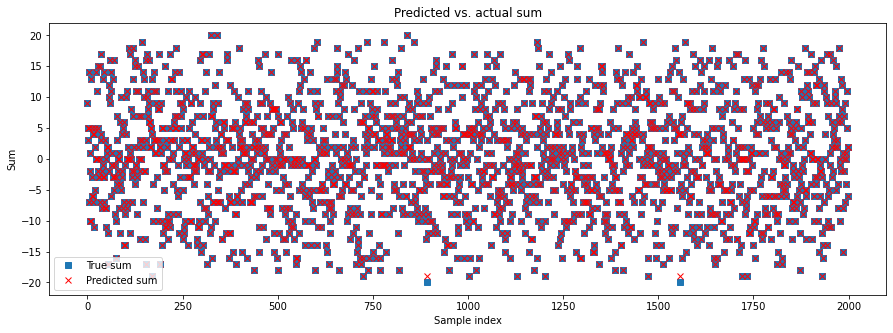

In [18]:
# Some plots from the final model
# Generate data
data = torch.randint(low=-10, high=11, size=(N, 2)).float()

# "labels"
labels = torch.sum(data, axis=1, keepdim=True)

# Evaluate the model and compute accuracy
with torch.no_grad():
    predictions = adding_machine(data)

# True and predicted values
fig = plt.figure(figsize=(15, 5))
plt.plot(labels, 's')
plt.plot(np.round(predictions.detach()), 'rx')
plt.legend(['True sum', 'Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show